In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('HR_DS.csv')

In [11]:
# Convert 'Attrition' column to binary
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

In [16]:
# Label encode categorical columns
label_encoders = {}
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder

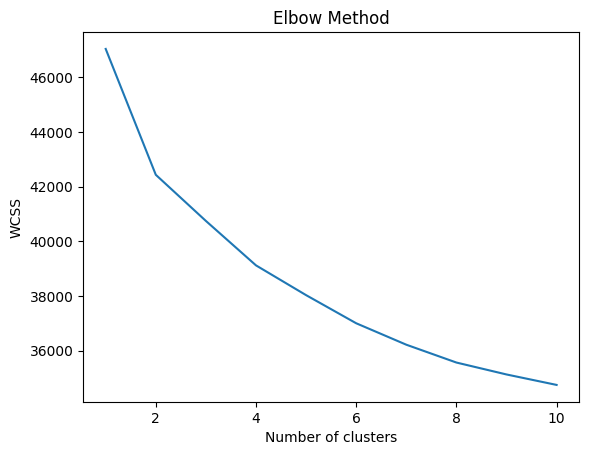

In [19]:
# Standardize the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Use the Elbow method to find a good number of clusters using WCSS (Within-Cluster-Sum-of-Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming that the optimal number of cluster based on the Elbow method is 'n', run KMeans
optimal_clusters = 3  # This is just a placeholder, replace with the number you find optimal from the above plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clustered_data = kmeans.fit_predict(scaled_features)

# Add the cluster column to the original dataframe
df['Cluster'] = clustered_data

In [20]:
# Cluster Size
cluster_sizes = df.groupby('Cluster').size()
print(cluster_sizes)

Cluster
0    227
1    407
2    836
dtype: int64


In [21]:
# Cluster Centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns)
print(centroids)

ValueError: Shape of passed values is (3, 35), indices imply (3, 36)

In [6]:
# Feature-wise Distribution
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

TypeError: agg function failed [how->mean,dtype->object]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


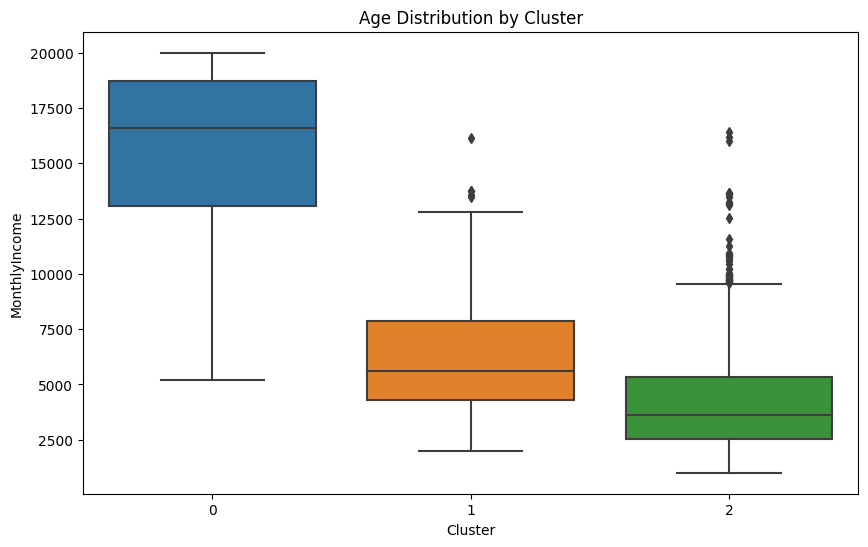

In [9]:
# Visualization Example (Using Boxplot for 'Age' across clusters)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='MonthlyIncome', data=df)
plt.title('Age Distribution by Cluster')
plt.show()